# Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Dataset

In [2]:
(train_images, train_labels),(test_images,test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [4]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
train_ds = train_ds.shuffle(1000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test_ds = test_ds.shuffle(1000).batch(32)

# Model

In [5]:
def get_model():
  model=tf.keras.Sequential([
                             layers.Conv2D(32,3,activation='relu',padding='same'),
                             layers.Conv2D(32,3,activation='relu'),
                             layers.MaxPooling2D(pool_size=(2,2)),
                             layers.Dropout(0.25),
                             layers.Conv2D(64,3,activation='relu',padding='same'),
                             layers.Conv2D(64,5,activation='relu'),
                             layers.MaxPooling2D(pool_size=(2,2)),
                             layers.Dropout(0.25),
                             layers.Flatten(),
                             layers.Dense(512,activation='relu'),
                             layers.Dropout(0.5),
                             layers.Dense(10,activation='softmax'),
                             
  ])
  model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
  return model

In [6]:
model = get_model()
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5120 - accuracy: 0.4498 - val_loss: 1.1865 - val_accuracy: 0.5806
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1240 - accuracy: 0.5996 - val_loss: 0.9817 - val_accuracy: 0.6523
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9741 - accuracy: 0.6550 - val_loss: 0.8604 - val_accuracy: 0.6971
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8876 - accuracy: 0.6883 - val_loss: 0.8008 - val_accuracy: 0.7191
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8267 - accuracy: 0.7108 - val_loss: 0.8011 - val_accuracy: 0.7213
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7790 - accuracy: 0.7262 - val_loss: 0.7283 - val_accuracy: 0.7500
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7429 - accuracy: 0.7410 - val_loss: 0.7409 - val_acc

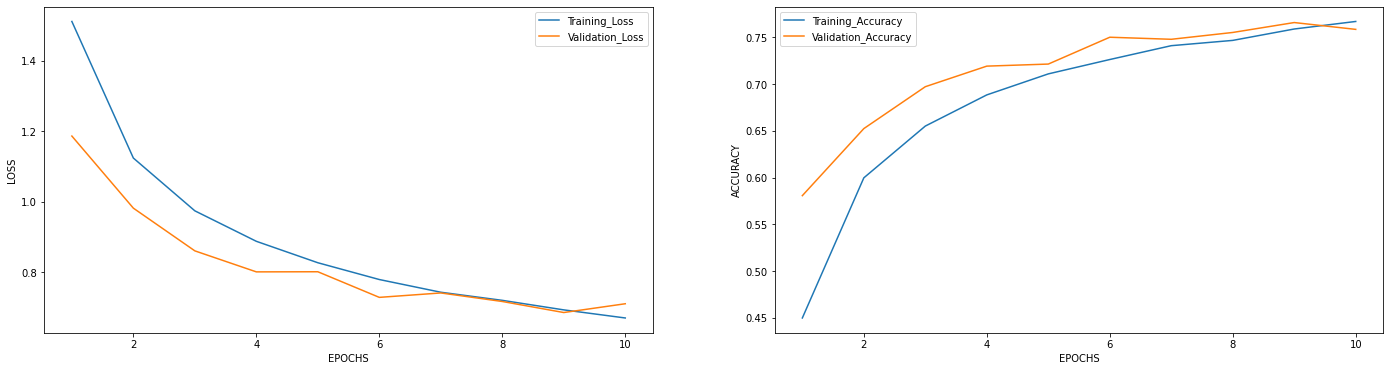

In [8]:
training_loss=history.history['loss']
validation_loss=history.history['val_loss']
training_acc=history.history['accuracy']
validation_acc=history.history['val_accuracy']

epochs=range(1,11)
fig, ax = plt.subplots(1, 2, figsize=(24, 6) )

ax[0].plot(epochs,training_loss,label='Training_Loss')
ax[0].plot(epochs,validation_loss,label='Validation_Loss')
ax[0].set_xlabel('EPOCHS')
ax[0].set_ylabel('LOSS')
ax[0].legend()
ax[1].plot(epochs,training_acc,label='Training_Accuracy')
ax[1].plot(epochs,validation_acc,label='Validation_Accuracy')
ax[1].set_xlabel('EPOCHS')
ax[1].set_ylabel('ACCURACY')
ax[1].legend()
plt.show()

# VGG16 Model Transfer learning

In [50]:
from tensorflow.keras.applications import VGG16


In [76]:
vgg_model = VGG16(include_top=False,input_shape=(32,32,3))

In [77]:
vgg_model.trainable = False

In [78]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [79]:
layer_output = vgg_model.get_layer('block3_pool').output

In [80]:
layer_output.shape

TensorShape([None, 4, 4, 256])

In [82]:
x=layer_output
x=layers.GlobalAveragePooling2D()(x)
x=layers.BatchNormalization()(x)
x=layers.Dense(256,activation = 'relu')(x)
x=layers.Dense(256,activation = 'relu')(x)
#x=layers.Dropout(0.25)(x)
#x=layers.Dense(512,activation = 'relu')(x)
x=layers.Dropout(0.5)(x)
x=layers.Dense(10,activation='softmax')(x)
new_model = models.Model(vgg_model.input,x)

new_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [83]:
history = new_model.fit(train_ds,epochs=9,validation_data=test_ds)

Epoch 1/9
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1906 - accuracy: 0.5841 - val_loss: 0.9059 - val_accuracy: 0.6822
Epoch 2/9
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9694 - accuracy: 0.6632 - val_loss: 0.8304 - val_accuracy: 0.7066
Epoch 3/9
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8961 - accuracy: 0.6881 - val_loss: 0.8029 - val_accuracy: 0.7127
Epoch 4/9
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8443 - accuracy: 0.7079 - val_loss: 0.8068 - val_accuracy: 0.7183
Epoch 5/9
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8027 - accuracy: 0.7214 - val_loss: 0.7864 - val_accuracy: 0.7238
Epoch 6/9
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7667 - accuracy: 0.7350 - val_loss: 0.7602 - val_accuracy: 0.7386
Epoch 7/9
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7369 - accuracy: 0.7405 - val_loss: 0.7750 - val_accuracy: 0.7309

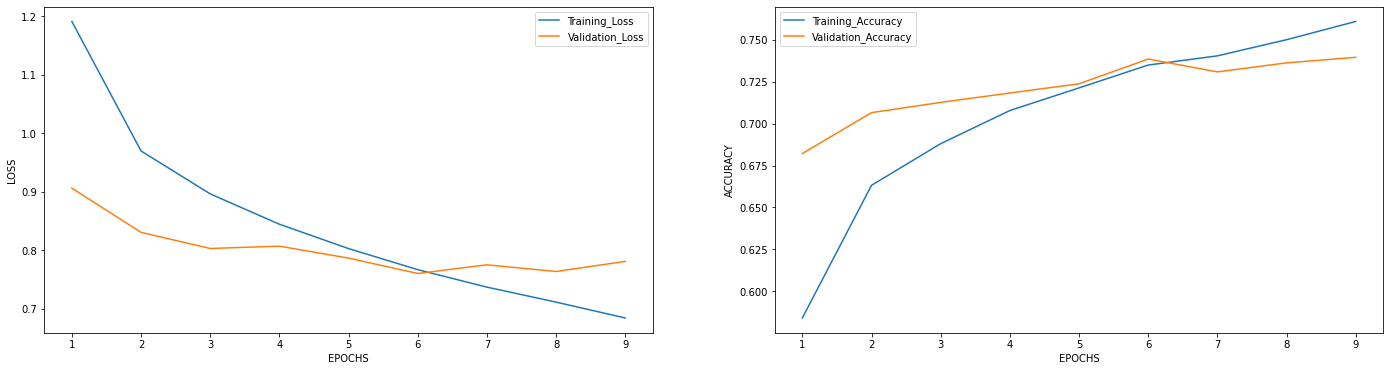

In [85]:
training_loss=history.history['loss']
validation_loss=history.history['val_loss']
training_acc=history.history['accuracy']
validation_acc=history.history['val_accuracy']

epochs=range(1,10)
fig, ax = plt.subplots(1, 2, figsize=(24, 6) )

ax[0].plot(epochs,training_loss,label='Training_Loss')
ax[0].plot(epochs,validation_loss,label='Validation_Loss')
ax[0].set_xlabel('EPOCHS')
ax[0].set_ylabel('LOSS')
ax[0].legend()
ax[1].plot(epochs,training_acc,label='Training_Accuracy')
ax[1].plot(epochs,validation_acc,label='Validation_Accuracy')
ax[1].set_xlabel('EPOCHS')
ax[1].set_ylabel('ACCURACY')
ax[1].legend()
plt.show()

# Visualizing Filters and Feature Maps

In [172]:
# loading model VGG16
model = VGG16(include_top=False)

In [87]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

Plotting 6 filter of convolution layer 1 rgb wise in gray mode

In [89]:
# printing layer names and filter shape in given layer
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters,bias = layer.get_weights()
  print(layer.name,filters.shape) 

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [91]:
# normalizing filter
filters=(filters-filters.min())/(filters.max()-filters.min())

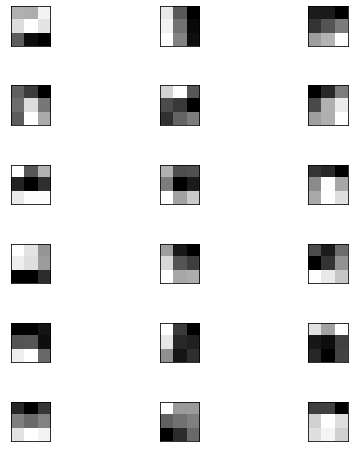

In [162]:
# plotting first 6 filters of first conv block
fig = plt.figure(figsize=(8, 8), constrained_layout=False)

outer_grid = fig.add_gridspec(6, 1, wspace=1.0, hspace=1.0)

for i in range(6):
  filter = filters[:,:,:,i]
  inner_grid = outer_grid[i].subgridspec(1, 3, wspace=0.0, hspace=0.0)
  for j in range(3):
    ax = fig.add_subplot(inner_grid[j])
    ax.imshow(filter[:,:,j],cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()

**Loading new model for VGG16 to feature map visualisation**

In [105]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [116]:
# creating new model from vgg16 output first conv layer
model = models.Model(model.input,model.layers[1].output)

In [117]:
# randomly selecting a img
img = train_images[4569]

In [118]:
# extracting feature maps
activations = model(img[np.newaxis,:,:,:])

In [129]:
activations.shape

TensorShape([1, 32, 32, 64])

**feature map of first conv layer**

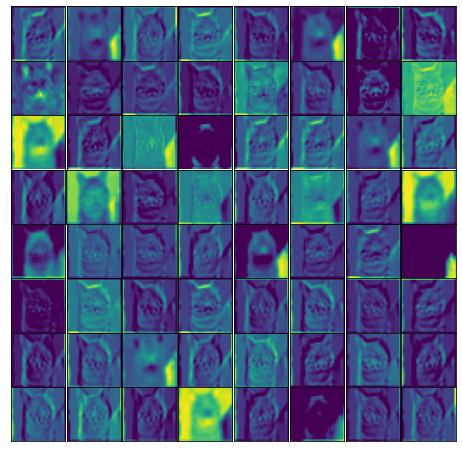

In [151]:
# plotting feature map
fig = plt.figure(figsize=(8, 8), constrained_layout=False)

outer_grid = fig.add_gridspec(8, 8, wspace=0.0, hspace=0.0)

for i in range(64):
    ax = fig.add_subplot(outer_grid[i])
    ax.imshow(activations[0,:,:,i])
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()

loading new model for layer 2,5,9,13,17 convnets visualization

In [175]:
# for 2,5,9,13,17 conv 
outputs=[]
for i in [2,5,9,13,17]:
  outputs.append(model.layers[i].output)
  

model = models.Model(model.input,outputs)

In [186]:
activations2,activations5,activations9,activations13,activations17=model(img[np.newaxis,:,:,:])

**feature map of 2 conv layer**

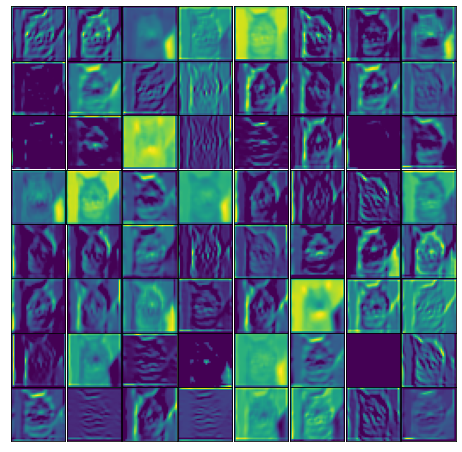

In [187]:
# plotting feature map
fig = plt.figure(figsize=(8, 8), constrained_layout=False)

outer_grid = fig.add_gridspec(8, 8, wspace=0.0, hspace=0.0)

for i in range(64):
    ax = fig.add_subplot(outer_grid[i])
    ax.imshow(activations2[0,:,:,i])
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()

**feature map of 5 conv layer**

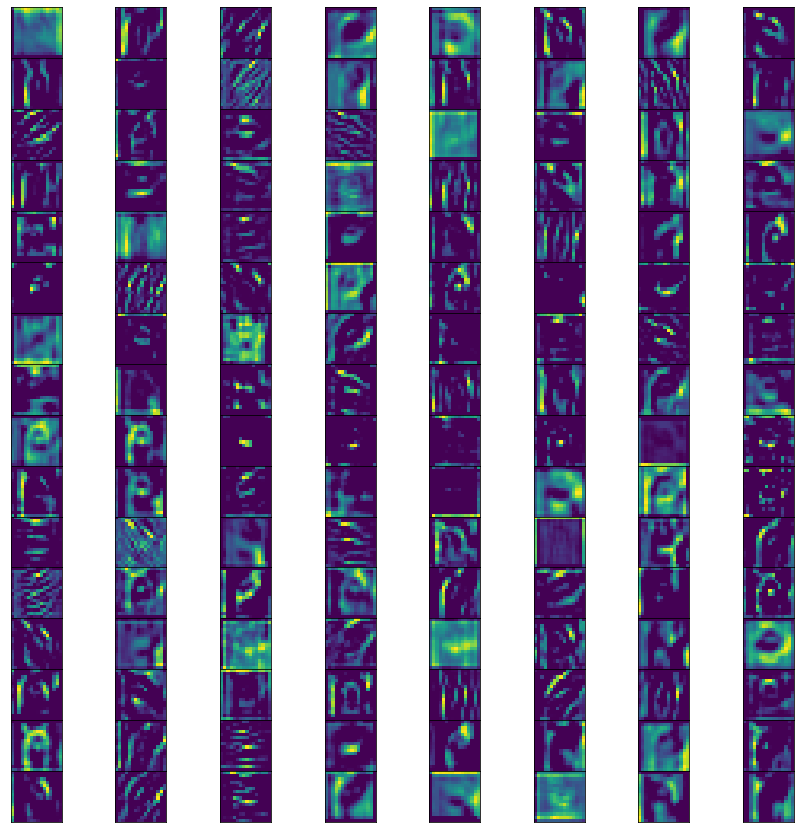

In [193]:
# plotting feature map
fig = plt.figure(figsize=(15,15), constrained_layout=False)

outer_grid = fig.add_gridspec(16, 8, wspace=0.0, hspace=0.0)

for i in range(128):
    ax = fig.add_subplot(outer_grid[i])
    ax.imshow(activations5[0,:,:,i])
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()

**feature map of 9 conv layer**

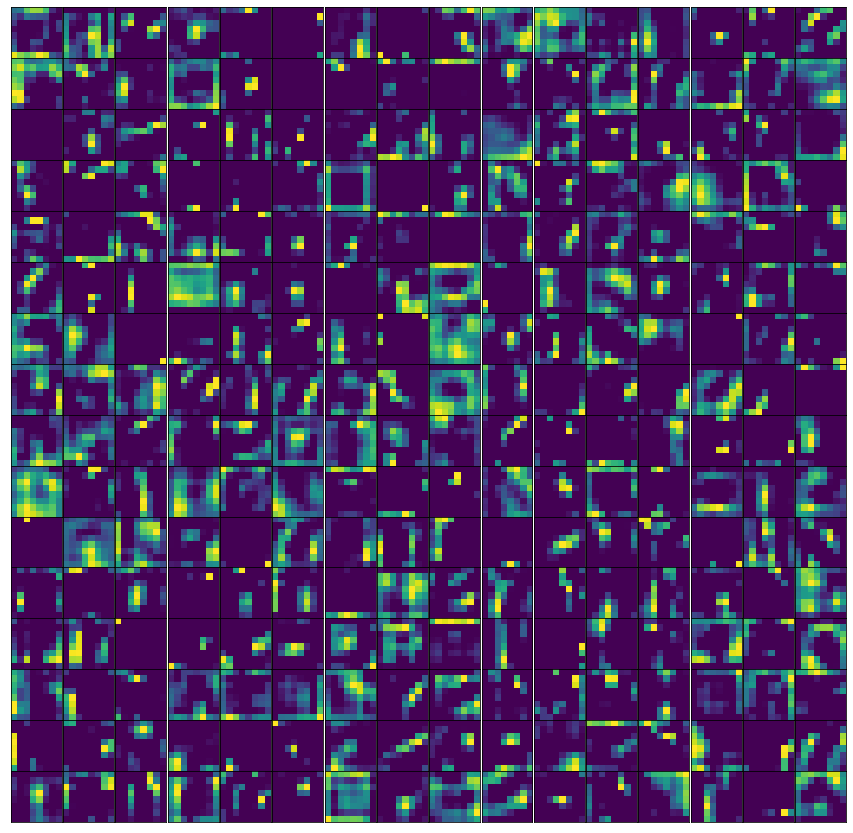

In [194]:
# plotting feature map
fig = plt.figure(figsize=(15,15), constrained_layout=False)

outer_grid = fig.add_gridspec(16, 16, wspace=0.0, hspace=0.0)

for i in range(256):
    ax = fig.add_subplot(outer_grid[i])
    ax.imshow(activations9[0,:,:,i])
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()

**feature map of 13 conv layer**

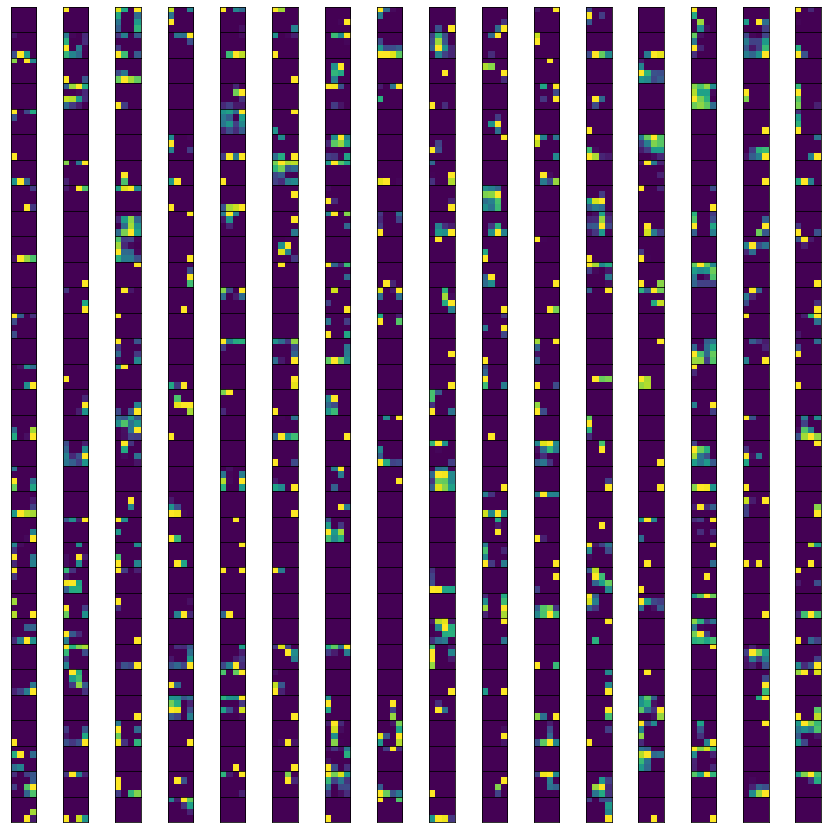

In [195]:
# plotting feature map
fig = plt.figure(figsize=(15,15), constrained_layout=False)

outer_grid = fig.add_gridspec(32, 16, wspace=0.0, hspace=0.0)

for i in range(512):
    ax = fig.add_subplot(outer_grid[i])
    ax.imshow(activations13[0,:,:,i])
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()

**feature map of 15 conv layer**

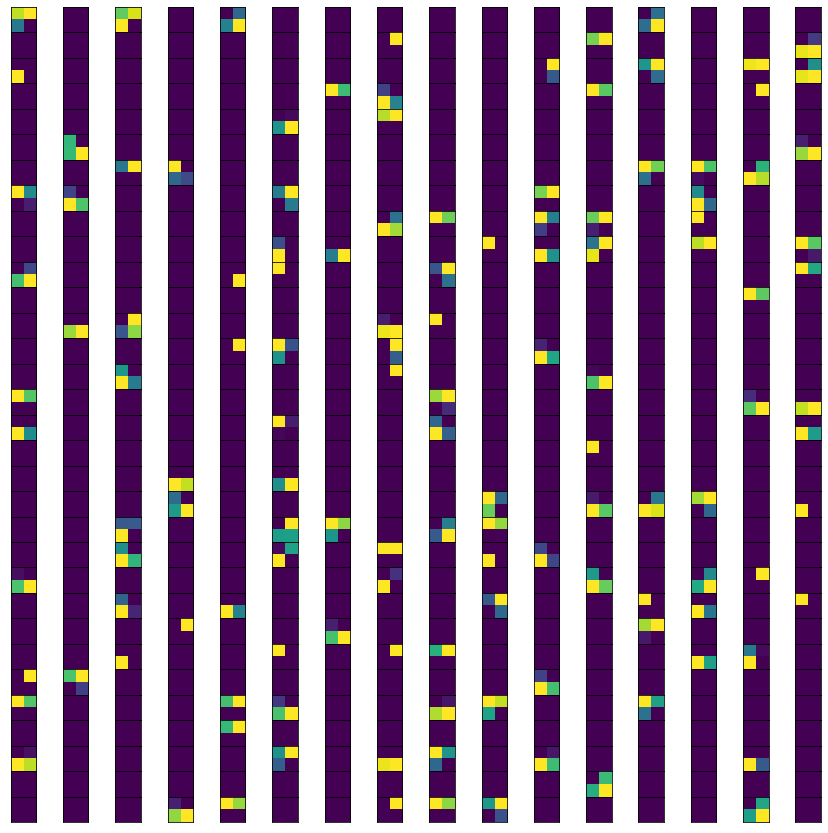

In [196]:
# plotting feature map
fig = plt.figure(figsize=(15,15), constrained_layout=False)

outer_grid = fig.add_gridspec(32, 16, wspace=0.0, hspace=0.0)

for i in range(512):
    ax = fig.add_subplot(outer_grid[i])
    ax.imshow(activations17[0,:,:,i])
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()